## Hipóteses

- H1: Os Incidentes representam mais de 50% das ocorrências e os Acidentes representam menos de 40% das Ocorrências.
- H2: Em todos as classificações de ocorrências os relátórios levam em média até 365 dias para serem publicados a partir da data da ocorrência.
- H3: A ocorrência de Acidentes cresce ao longo dos anos.
- H4: A maior quantidade de acidentes acontece durante o período da noite.
- H5: Os cincos estados que mais tiveram ocorrências registradas também são os cinco estados que mais registraram acidentes.
- H6: O tipo de aeronave Avião é responsável por mais de 50% das ocorrências.
- H7: Nos registros de acidentes a maior quantidade de nível de dano registrado está na categoria Substancial e Destruída.
- H8: O motor de Pistão é o que apresenta maior ocorrências de falha em voo.
- H9: As aeronaves que apresentaram a maior quantidade de ocorrencia por falha de motor em voo, são as aeronaves mais antigas.

### Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carregamento dos Dados

In [2]:
ocorrencias = pd.read_csv('ocorrencia.csv', sep = ';')
ocorrencia_tipo = pd.read_csv('ocorrencia_tipo.csv', sep = ';')
aeronave = pd.read_csv('aeronave.csv', sep = ';')

### Visualização e entendimento dos dados

In [3]:
pd.set_option('display.max_columns', None)
ocorrencias.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,BRASIL,****,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,BRASIL,****,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,BRASIL,****,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


In [4]:
ocorrencias.shape

(5167, 22)

In [5]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   codigo_ocorrencia1              5167 non-null   int64 
 2   codigo_ocorrencia2              5167 non-null   int64 
 3   codigo_ocorrencia3              5167 non-null   int64 
 4   codigo_ocorrencia4              5167 non-null   int64 
 5   ocorrencia_classificacao        5167 non-null   object
 6   ocorrencia_latitude             4192 non-null   object
 7   ocorrencia_longitude            4192 non-null   object
 8   ocorrencia_cidade               5167 non-null   object
 9   ocorrencia_uf                   5167 non-null   object
 10  ocorrencia_pais                 5167 non-null   object
 11  ocorrencia_aerodromo            5167 non-null   object
 12  ocorrencia_dia                  5167 non-null   

In [6]:
ocorrencias.isnull().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude                975
ocorrencia_longitude               975
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada     166
investigacao_status                257
divulgacao_relatorio_numero        384
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         3816
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [7]:
ocorrencias.investigacao_aeronave_liberada.value_counts()

SIM    3357
***    1612
NÃO      32
Name: investigacao_aeronave_liberada, dtype: int64

In [8]:
ocorrencias.investigacao_status.value_counts()

FINALIZADA    4489
ATIVA          421
Name: investigacao_status, dtype: int64

In [9]:
ocorrencias.divulgacao_relatorio_numero.value_counts()

***                   2907
A DEFINIR               51
ENCERRADA NO RAI        26
**                       7
A-128/CENIPA/2013        2
                      ... 
IG-022/CENIPA/2015       1
A-174/CENIPA/2015        1
A-020/CENIPA/2015        1
A-021/CENIPA/2015        1
A-144/CENIPA/2021        1
Name: divulgacao_relatorio_numero, Length: 1721, dtype: int64

In [10]:
ocorrencias.codigo_ocorrencia.nunique()

5167

In [11]:
ocorrencias.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,total_recomendacoes,total_aeronaves_envolvidas
count,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000
mean,64008.273660,64008.273660,64008.273660,64008.273660,64008.273660,0.231662,1.013160
std,13765.727151,13765.727151,13765.727151,13765.727151,13765.727151,0.842137,0.118959
min,45331.000000,45331.000000,45331.000000,45331.000000,45331.000000,0.000000,1.000000
25%,50978.500000,50978.500000,50978.500000,50978.500000,50978.500000,0.000000,1.000000
50%,65530.000000,65530.000000,65530.000000,65530.000000,65530.000000,0.000000,1.000000
75%,78832.500000,78832.500000,78832.500000,78832.500000,78832.500000,0.000000,1.000000
max,80468.000000,80468.000000,80468.000000,80468.000000,80468.000000,13.000000,3.000000


In [12]:
ocorrencias.divulgacao_relatorio_publicado.value_counts()

NÃO    3818
SIM    1349
Name: divulgacao_relatorio_publicado, dtype: int64

In [13]:
ocorrencias.divulgacao_dia_publicacao.notnull().sum()

1351

In [14]:
ocorrencias[ocorrencias['divulgacao_relatorio_publicado']== 'SIM']['divulgacao_dia_publicacao'].isnull().sum()

0

In [15]:
aeronave.shape

(5235, 23)

In [16]:
aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,50.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0
1,45332,PTUDD,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,1987.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,PTGOO,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,1976.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,PRMHX,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,77000,184.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,PTUEW,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,1989.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0


In [17]:
aeronave.aeronave_nivel_dano.value_counts()

NENHUM         1879
LEVE           1510
SUBSTANCIAL    1499
DESTRUÍDA       300
***              47
Name: aeronave_nivel_dano, dtype: int64

In [18]:
aeronave.aeronave_motor_tipo.unique()

array(['TURBOÉLICE', 'PISTÃO', 'JATO', 'TURBOEIXO', 'SEM TRAÇÃO', '***',
       nan], dtype=object)

In [19]:
ocorrencia_tipo.head()

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT


# Criação de novos campos

In [20]:
ocorrencias['ocorrencia_dia'] = pd.to_datetime(ocorrencias['ocorrencia_dia'],format='%d/%m/%Y')
ocorrencias['meses'] = ocorrencias['ocorrencia_dia'].dt.month
ocorrencias['ano'] = ocorrencias['ocorrencia_dia'].dt.year

# Hipóteses

## H1: Os Incidentes representam mais de 50% das ocorrências e os Acidentes representam menos de 40% das Ocorrências.


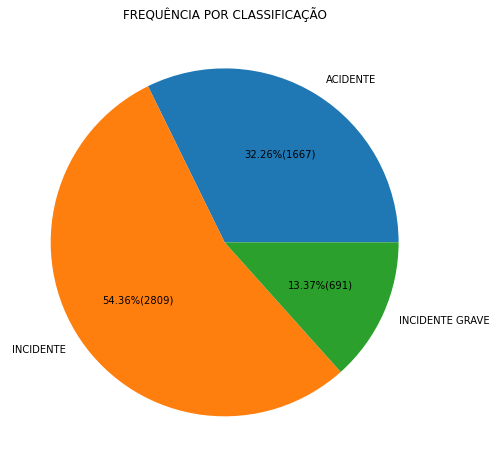

In [21]:
ax1 = ocorrencias.groupby('ocorrencia_classificacao').size()

ax1.plot(kind='pie',
          title='FREQUÊNCIA POR CLASSIFICAÇÃO',
          figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*ax1.sum()))

plt.ylabel("")
plt.savefig("H1.jpg",dpi=300)
plt.show()


# ---------------------------------------------------------------------------------------------------------------

## H2: Em todos as classificações de ocorrências os relátórios levam em média até 365 dias para serem publicados a partir da data da ocorrência.

In [22]:

relatorios_divulgados = ocorrencias[ocorrencias['divulgacao_relatorio_publicado']== 'SIM'].copy()

relatorios_divulgados['ocorrencia_dia'] = pd.to_datetime(relatorios_divulgados['ocorrencia_dia'],format='%d/%m/%Y')
relatorios_divulgados['divulgacao_dia_publicacao'] = pd.to_datetime(relatorios_divulgados['divulgacao_dia_publicacao'])

relatorios_divulgados['diferenca_dias'] = (relatorios_divulgados['divulgacao_dia_publicacao'] - relatorios_divulgados['ocorrencia_dia']).dt.days


  ocorrencia_classificacao  diferenca_dias
0                 ACIDENTE             739
1                INCIDENTE             703
2          INCIDENTE GRAVE             736


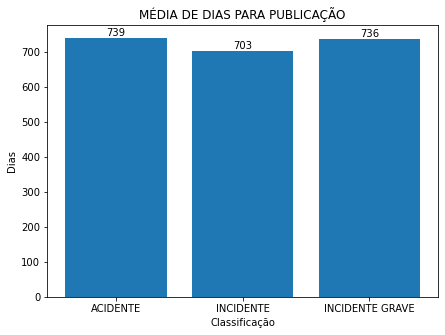

In [23]:
ax1 = relatorios_divulgados[['diferenca_dias', 'ocorrencia_classificacao']].groupby('ocorrencia_classificacao').mean().reset_index()
ax1['diferenca_dias'] = ax1['diferenca_dias'].apply(int)
print(ax1)

plt.figure(figsize=(7, 5))
ax = plt.bar(ax1['ocorrencia_classificacao'], ax1['diferenca_dias'])
plt.bar_label(ax)
plt.title('MÉDIA DE DIAS PARA PUBLICAÇÃO')
plt.ylabel('Dias')
plt.xlabel('Classificação')

plt.savefig("H2.jpg",dpi=300)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## H3: A ocorrência de Acidentes cresce ao longo dos anos.

In [24]:
acidentes = ocorrencias[(ocorrencias['ocorrencia_classificacao'] == 'ACIDENTE')].copy()

C:\Users\kleme\anaconda3\envs\olist-amb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


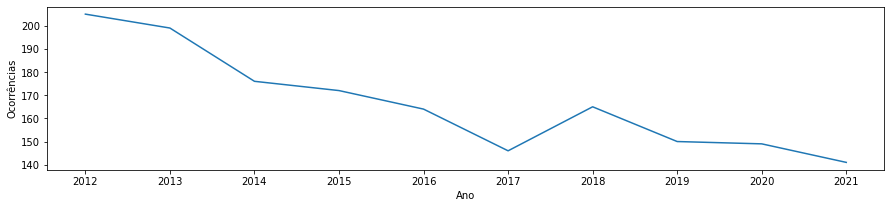

In [25]:
ax1 = acidentes['ano'].value_counts().rename_axis('ano').reset_index(name='contagem').copy()
ax1 = ax1.sort_values('ano')

plt.figure(figsize=(15, 3))
sns.lineplot(ax1['ano'], ax1['contagem'])
plt.xticks(ax1['ano'])
plt.ylabel('Ocorrências')
plt.xlabel('Ano')

plt.savefig("H3.jpg",dpi=300)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## H4: A maior quantidade de acidentes acontece durante o período da noite.

In [26]:
ax1 = acidentes
ax1['hora'] = acidentes['ocorrencia_hora'].astype(str).str[:2]
ax1['hora'] = pd.to_numeric(ax1['hora'])

periodo = []

for h in ax1['hora']:
    if h < 6:    periodo.append('MADRUGADA')
    elif h < 12:   periodo.append('MANHÃ')
    elif h < 18:  periodo.append('TARDE')
    elif h <= 23:  periodo.append('NOITE')
    else:           periodo.append('SEM PERÍODO')
            
ax1['periodo'] = periodo

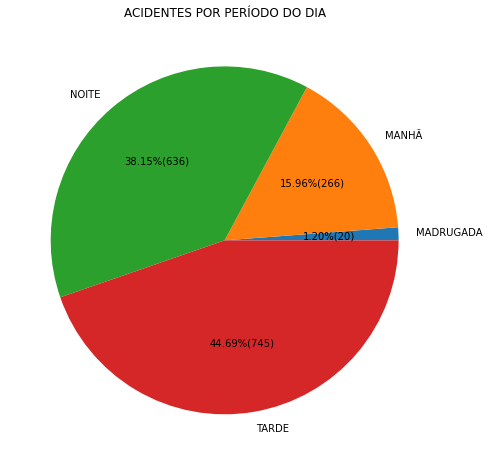

In [27]:
clas = ax1.groupby('periodo').size()

clas.plot(kind='pie',
          title='ACIDENTES POR PERÍODO DO DIA',
          figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*clas.sum()))

plt.ylabel("")

plt.savefig("H4.jpg",dpi=300)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## H5: Os cincos estados que mais tiveram ocorrências registradas também são os cinco estados que mais registraram acidentes.

In [28]:
#Gráfico 1
ax1 = ocorrencias['ocorrencia_uf'].value_counts().head(5).rename_axis('estado').reset_index(name='contagem')
ax1 = ax1.sort_values('contagem')

#Gráfico 2
ax2 = acidentes
ax2 = ax2['ocorrencia_uf'].value_counts().head(5).rename_axis('estado').reset_index(name='contagem')
ax2 = ax2.sort_values('contagem')

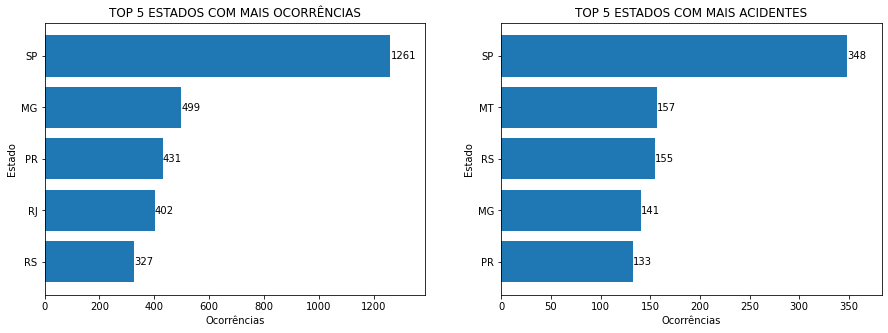

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

ae = plt.barh(ax1['estado'], ax1['contagem'])
plt.bar_label(ae)
plt.margins(0.1, 0.05)
plt.title('TOP 5 ESTADOS COM MAIS OCORRÊNCIAS')
plt.ylabel('Estado')
plt.xlabel('Ocorrências')

plt.subplot(1,2,2)
ae = plt.barh(ax2['estado'], ax2['contagem'])
plt.bar_label(ae)
plt.margins(0.1, 0.05)
plt.title('TOP 5 ESTADOS COM MAIS ACIDENTES')
plt.ylabel('Estado')
plt.xlabel('Ocorrências')

plt.savefig("H5.jpg",dpi=300)
plt.show()

# --------------------------------------------------------------------------------------------------------------

## H6: O tipo de aeronave Avião é responsável por mais de 50% das ocorrências. 

In [30]:
oc_aeronave = pd.merge(ocorrencias, aeronave, on=["codigo_ocorrencia2","codigo_ocorrencia2"], how="left")

In [31]:
tipo_aeronave = oc_aeronave['aeronave_tipo_veiculo'].value_counts().rename_axis('tipo').reset_index(name='contagem')

freq = np.array(round(oc_aeronave['aeronave_tipo_veiculo'].value_counts()/ oc_aeronave['aeronave_tipo_veiculo'].value_counts().sum(), 4) * 100)

tipo_aeronave['Porcentagem'] = freq

          tipo  contagem  Porcentagem
0        AVIÃO      4188        80.00
1  HELICÓPTERO       550        10.51
2    ULTRALEVE       304         5.81
3          ***       155         2.96
4     PLANADOR        17         0.32
5      ANFÍBIO        12         0.23
6        TRIKE         5         0.10
7    DIRIGÍVEL         2         0.04
8        BALÃO         1         0.02
9   HIDROAVIÃO         1         0.02


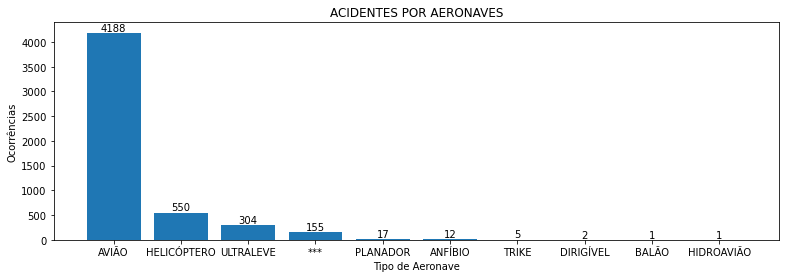

In [32]:
print(tipo_aeronave)

plt.figure(figsize=(13, 4))

ta = plt.bar(tipo_aeronave['tipo'], tipo_aeronave['contagem'])
plt.bar_label(ta)
plt.title('ACIDENTES POR AERONAVES')
plt.xticks(tipo_aeronave['tipo'])
plt.ylabel('Ocorrências')
plt.xlabel('Tipo de Aeronave')

plt.savefig("H6.jpg",dpi=300)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## H7: Nos registros de acidentes a maior quantidade de nível de dano registrado estão nas categorias Substancial e Destruída. 

In [33]:
acidentes_aeronave = oc_aeronave[(oc_aeronave['ocorrencia_classificacao'] == 'ACIDENTE')].copy()

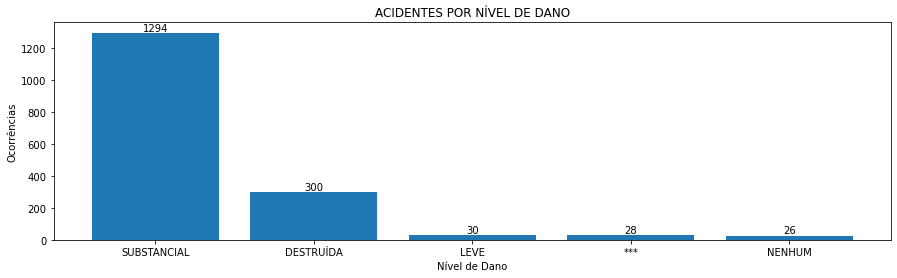

In [34]:
ax1 = acidentes_aeronave['aeronave_nivel_dano'].value_counts().rename_axis('categoria').reset_index(name='contagem')

plt.figure(figsize=(15, 4))

ta = plt.bar(ax1['categoria'], ax1['contagem'])
plt.bar_label(ta)
plt.xticks(ax1['categoria'])
plt.title('ACIDENTES POR NÍVEL DE DANO')
plt.ylabel('Ocorrências')
plt.xlabel('Nível de Dano')

plt.savefig("H7.jpg",dpi=300)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## H8: O motor de Pistão é o que apresenta maior ocorrências de falha em voo.

In [35]:
oc_tipo = pd.merge(oc_aeronave, ocorrencia_tipo, on=["codigo_ocorrencia1","codigo_ocorrencia1"], how="left")
oc_tipo.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,meses,ano,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,SBPA,2012-01-05,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO,1,2012,PRCDL,PARTICULAR,AVIÃO,RAYTHEON AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,2495,2495,6.0,2003.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,2012-01-06,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO,1,2012,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,50.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,BRASIL,****,2012-01-06,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO,1,2012,PTGOO,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,1976.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,BRASIL,****,2012-01-06,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,1,2012,PUUSS,EXPERIMENTAL,ULTRALEVE,***,P2004 BRAVO,ULAC,PISTÃO,MONOMOTOR,580,580,2.0,2007.0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,EXPERIMENTAL,LEVE,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,BRASIL,****,2012-01-06,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO,1,2012,PTUCL,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,1986.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


In [36]:
falha_motor = oc_tipo[(oc_tipo['ocorrencia_tipo'] == 'FALHA DO MOTOR EM VOO')].copy()

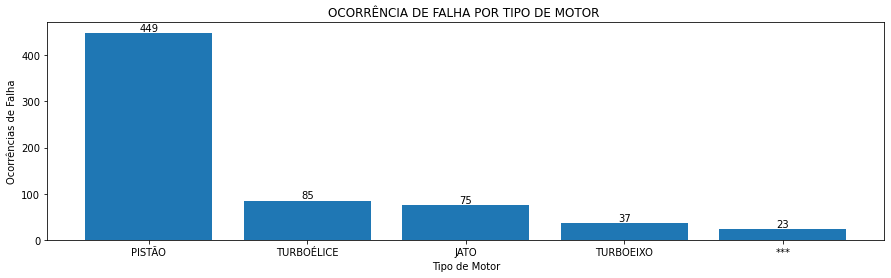

In [37]:
ax1 = falha_motor['aeronave_motor_tipo'].value_counts().rename_axis('motor').reset_index(name='contagem')

plt.figure(figsize=(15, 4))
ta = plt.bar(ax1['motor'], ax1['contagem'])
plt.bar_label(ta)
plt.xticks(ax1['motor'])
plt.title('OCORRÊNCIA DE FALHA POR TIPO DE MOTOR ')
plt.ylabel('Ocorrências de Falha')
plt.xlabel('Tipo de Motor')

plt.savefig("H8.jpg",dpi=300)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## H9: As aeronaves que apresentaram a maior quantidade de ocorrencia por falha de motor em voo, são as aeronaves mais antigas.

In [38]:
#Gráfico 1
ax1 = falha_motor['aeronave_ano_fabricacao'].value_counts().head(10).rename_axis('ano').reset_index(name='contagem')
ax1['ano'] = ax1.ano.apply(int).apply(str).replace('0', 'ANR') # ANO NÃO REGISTRADO

#Gráfico 2
ax2 = falha_motor['aeronave_ano_fabricacao'].value_counts().rename_axis('ano').reset_index(name='contagem')
ax2 = ax2.sort_values('ano').head(10)
ax2['ano'] = ax2.ano.apply(int).apply(str).replace('0', 'ANR') # ANO NÃO REGISTRADO

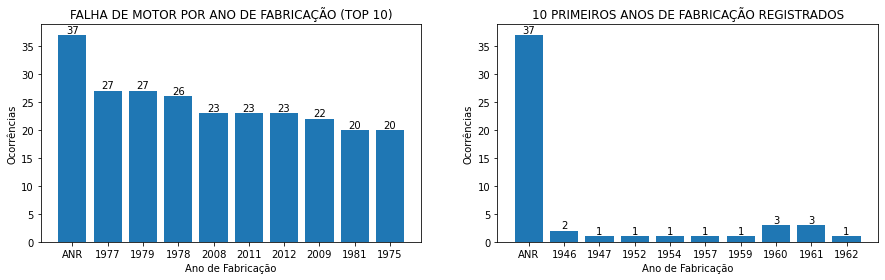

In [39]:
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
ta = plt.bar(ax1['ano'], ax1['contagem'])
plt.bar_label(ta)
plt.title('FALHA DE MOTOR POR ANO DE FABRICAÇÃO (TOP 10)')
plt.ylabel('Ocorrências')
plt.xlabel('Ano de Fabricação')

plt.subplot(1,2,2)
ta = plt.bar(ax2['ano'], ax2['contagem'])
plt.bar_label(ta)
plt.title('10 PRIMEIROS ANOS DE FABRICAÇÃO REGISTRADOS')
plt.ylabel('Ocorrências')
plt.xlabel('Ano de Fabricação')

plt.savefig("H9.jpg",dpi=300)
plt.show()